In [7]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import os
import matplotlib.pyplot as plt
import seaborn as sns

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanic/train.csv
/kaggle/input/titanic/test.csv
/kaggle/input/titanic/gender_submission.csv


In [8]:
df_train = pd.read_csv('/kaggle/input/titanic/train.csv')
df_test = pd.read_csv('/kaggle/input/titanic/test.csv')

In [9]:
df_train

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
...,...,...,...,...,...,...,...,...,...,...,...,...
886,887,0,2,"Montvila, Rev. Juozas",male,27.0,0,0,211536,13.0000,NaN,S
887,888,1,1,"Graham, Miss. Margaret Edith",female,19.0,0,0,112053,30.0000,B42,S
888,889,0,3,"Johnston, Miss. Catherine Helen ""Carrie""",female,NaN,1,2,W./C. 6607,23.4500,NaN,S
889,890,1,1,"Behr, Mr. Karl Howell",male,26.0,0,0,111369,30.0000,C148,C


In [10]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


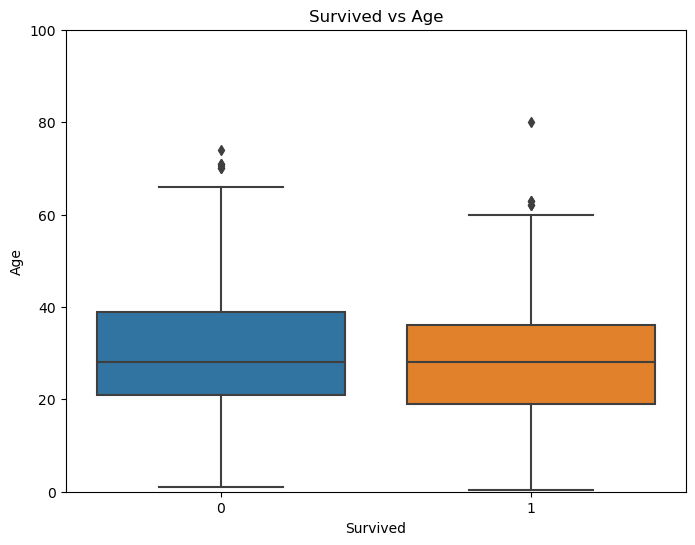

In [11]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.boxplot(x='Survived',y='Age', data=df_train)
ax.set_ylim(0,100)
plt.title("Survived vs Age")
plt.show()

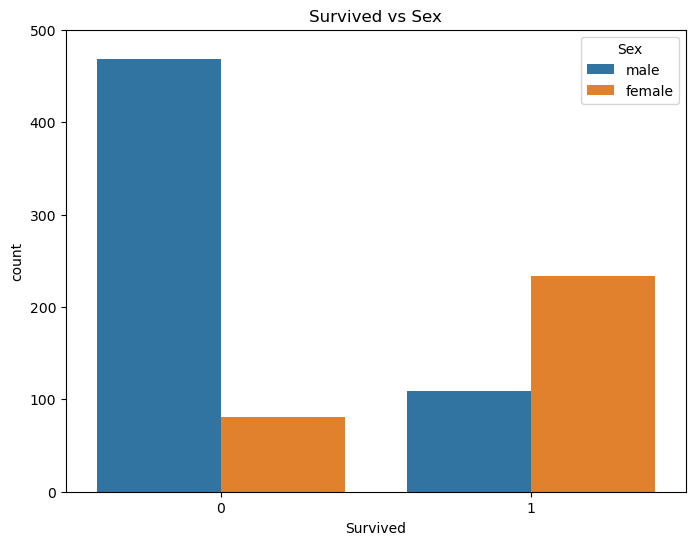

In [12]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Survived' ,hue='Sex', data=df_train)
ax.set_ylim(0,500)
plt.title("Survived vs Sex")
plt.show()

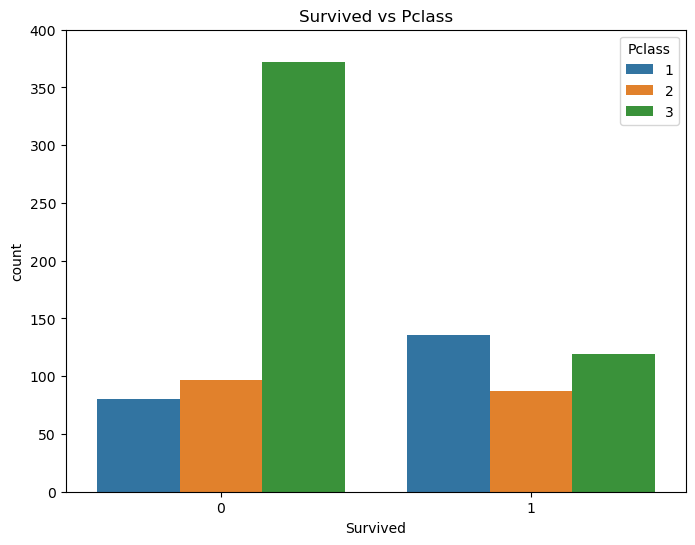

In [13]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Survived' ,hue='Pclass', data=df_train)
ax.set_ylim(0,400)
plt.title("Survived vs Pclass")
plt.show()

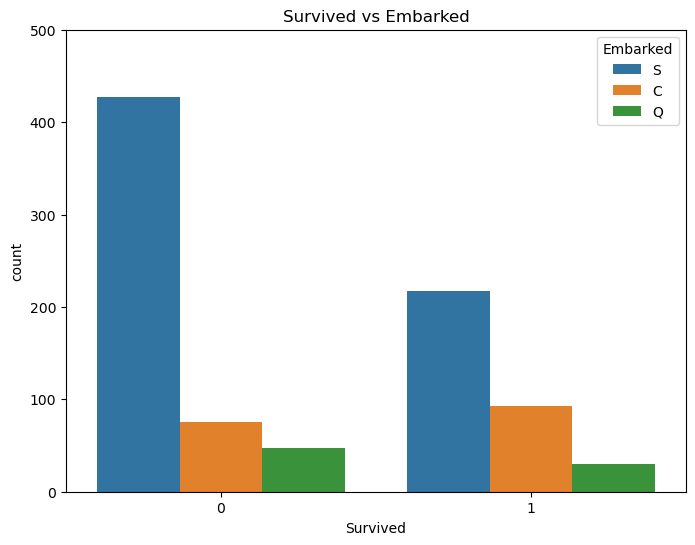

In [14]:
fig, ax=plt.subplots(1,figsize=(8,6))
sns.countplot(x='Survived' ,hue='Embarked', data=df_train)
ax.set_ylim(0,500)
plt.title("Survived vs Embarked")
plt.show()

In [15]:
train_Y = df_train['Survived']
ids = df_test['PassengerId']
df_train = df_train.drop(['PassengerId', 'Survived', 'Name', 'Ticket','Cabin'] , axis=1)
df_test = df_test.drop(['PassengerId', 'Name', 'Ticket','Cabin'] , axis=1)

combine = [df_train, df_test]

for df in combine:
    df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [16]:
df_test.head()

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked,FamilySize
0,3,male,34.5,0,0,7.8292,Q,1
1,3,female,47.0,1,0,7.0000,S,2
2,2,male,62.0,0,0,9.6875,Q,1
3,3,male,27.0,0,0,8.6625,S,1
4,3,female,22.0,1,1,12.2875,S,3


In [17]:
df_train = df_train.drop(['SibSp', 'Parch'] , axis=1)
df_test = df_test.drop(['SibSp', 'Parch',] , axis=1)

In [18]:
df = pd.concat([df_train,df_test])

df.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,3,male,22.0,7.2500,S,2
1,1,female,38.0,71.2833,C,2
2,3,female,26.0,7.9250,S,1
3,1,female,35.0,53.1000,S,2
4,3,male,35.0,8.0500,S,1


In [19]:
from sklearn.preprocessing import LabelEncoder, MinMaxScaler

MMEncoder = MinMaxScaler()
LEncoder = LabelEncoder()

for c in df.columns:
    if df[c].dtype == 'object':
        df[c] = df[c].fillna('None')
        df[c] = LEncoder.fit_transform(df[c]) 
    else:
        df[c] = df[c].fillna(-1)
    df[c] = MMEncoder.fit_transform(df[c].values.reshape(-1, 1))

df.head()

,Pclass,Sex,Age,Fare,Embarked,FamilySize
0,1.0,1.0,0.283951,0.016072,1.0,0.1
1,0.0,0.0,0.481481,0.140813,0.0,0.1
2,1.0,0.0,0.333333,0.017387,1.0,0.0
3,0.0,0.0,0.444444,0.105390,1.0,0.1
4,1.0,1.0,0.444444,0.017630,1.0,0.0


In [20]:
from sklearn import datasets, metrics
from sklearn.model_selection import train_test_split
from sklearn.ensemble import GradientBoostingClassifier


train_num = train_Y.shape[0]
train_X = df[:train_num]
test_X = df[train_num:]

clf = GradientBoostingClassifier()
clf.fit(train_X, train_Y)
pred = clf.predict(test_X)
pred = np.array(pred)

In [23]:
sub = pd.DataFrame({'PassengerId': ids, 'Survived': pred})
sub.to_csv('submission.csv', index=False) 